In [3]:
# Question: Evaluating Data Distribution
# Description: Analyze the distribution of a numeric column using histograms and descriptive statistics.



'customer_data.csv' created successfully with sample data.
'customer_data.csv' loaded successfully for analysis.

Columns in dataset: ['CustomerID', 'Age', 'Income', 'Gender', 'City']

Missing values in 'Age': 0

Descriptive Statistics for 'Age':
count    50.000000
mean     35.600000
std       8.680261
min      22.000000
25%      29.250000
50%      33.000000
75%      41.750000
max      54.000000
Name: Age, dtype: float64


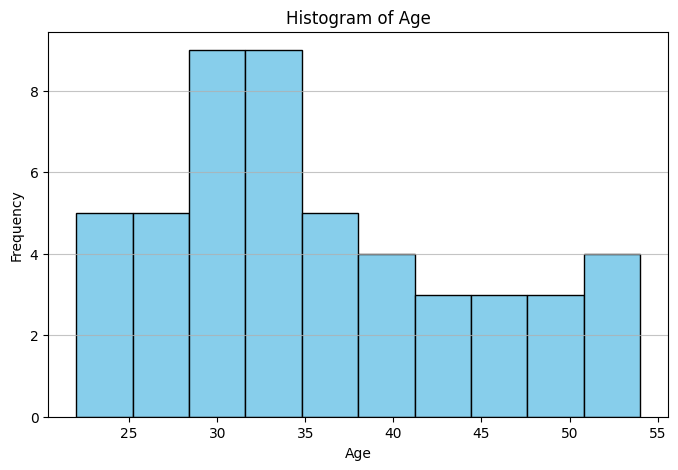

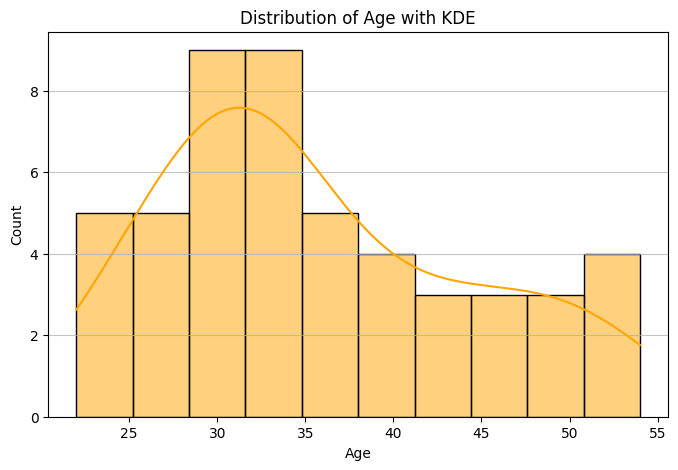

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os # Import the os module to manage file paths

# --- Part 1: Manually Create and Save a Sample CSV File ---
# Define sample data for the DataFrame
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                   11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
                   21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
                   31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
                   41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
    'Age': [25, 30, 35, 28, 40, 22, 50, 45, 32, 29,
            26, 31, 36, 29, 41, 23, 51, 46, 33, 30,
            27, 32, 37, 30, 42, 24, 52, 47, 34, 31,
            28, 33, 38, 31, 43, 25, 53, 48, 35, 32,
            29, 34, 39, 32, 44, 26, 54, 49, 36, 33],
    'Income': [50000, 60000, 75000, 55000, 80000, 45000, 90000, 85000, 62000, 58000,
               51000, 61000, 76000, 56000, 81000, 46000, 91000, 86000, 63000, 59000,
               52000, 62000, 77000, 57000, 82000, 47000, 92000, 87000, 64000, 60000,
               53000, 63000, 78000, 58000, 83000, 48000, 93000, 88000, 65000, 61000,
               54000, 64000, 79000, 59000, 84000, 49000, 94000, 89000, 66000, 62000],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
               'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
               'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
               'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female',
               'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose',
             'New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose',
             'New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose',
             'New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose',
             'New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose']
}

# Create the DataFrame
sample_df = pd.DataFrame(data)

# Define the file path for the CSV
csv_file_path = 'customer_data.csv'

# Save the DataFrame to a CSV file
# index=False prevents Pandas from writing the DataFrame index as a column in the CSV
try:
    sample_df.to_csv(csv_file_path, index=False)
    print(f"'{csv_file_path}' created successfully with sample data.")
except Exception as e:
    print(f"Error creating CSV file: {e}")
    # Exit if we can't create the file, as the rest of the script depends on it
    exit()

# --- Part 2: Analyze the Distribution of a Numeric Column ---
# Load dataset from the newly created CSV file
try:
    df = pd.read_csv(csv_file_path)
    print(f"'{csv_file_path}' loaded successfully for analysis.")
except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found. Please ensure it was created correctly.")
    exit()
except Exception as e:
    print(f"Error loading CSV file: {e}")
    exit()


# Print columns to verify column names
print("\nColumns in dataset:", df.columns.tolist()) # .tolist() makes it print nicely

# Set the numeric column name exactly as it appears in your CSV
numeric_col = 'Age'  # This matches the column name in our generated CSV

# Check if the numeric_col exists in the DataFrame
if numeric_col not in df.columns:
    print(f"Error: Column '{numeric_col}' not found in the dataset.")
    print("Available columns are:", df.columns.tolist())
    exit()

# Convert the column to numeric, forcing errors to NaN
# This is crucial for handling any non-numeric entries if the data were real
df[numeric_col] = pd.to_numeric(df[numeric_col], errors='coerce')

# Check for missing values in that column after conversion
missing_count = df[numeric_col].isnull().sum()
print(f"\nMissing values in '{numeric_col}':", missing_count)

# Descriptive statistics
print(f"\nDescriptive Statistics for '{numeric_col}':")
print(df[numeric_col].describe())

# Plot histogram with Matplotlib
plt.figure(figsize=(8, 5))
# Drop NA values before plotting to avoid errors with NaN in plotting functions
plt.hist(df[numeric_col].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title(f'Histogram of {numeric_col}')
plt.xlabel(numeric_col)
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75) # Add a grid for better readability
plt.show()

# Plot histogram with Seaborn including KDE
plt.figure(figsize=(8, 5))
# Drop NA values before plotting
sns.histplot(df[numeric_col].dropna(), bins=10, kde=True, color='orange')
plt.title(f'Distribution of {numeric_col} with KDE')
plt.xlabel(numeric_col)
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75) # Add a grid for better readability
plt.show()

# Optional: Clean up the created CSV file after analysis
# Uncomment the following lines if you want the script to delete the CSV file
# try:
#     os.remove(csv_file_path)
#     print(f"\nCleaned up: '{csv_file_path}' deleted.")
# except OSError as e:
#     print(f"Error deleting file {csv_file_path}: {e}")

